In [1]:
import pandas as pd

# Download the Iris dataset from UCI Machine Learning Repository
url_iris = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

# Load the Iris dataset
iris_data = pd.read_csv(url_iris, header=None, names=columns)

# Save the dataset to a CSV file
iris_data.to_csv('iris_dataset.csv', index=False)

print("Iris dataset downloaded and saved as 'iris_dataset.csv'.")


Iris dataset downloaded and saved as 'iris_dataset.csv'.


In [2]:
# Download the Wine Quality dataset
url_wine = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine_data = pd.read_csv(url_wine, sep=';')  # The data is separated by semicolons

# Save the dataset to a CSV file
wine_data.to_csv('wine_quality_dataset.csv', index=False)

print("Wine Quality dataset downloaded and saved as 'wine_quality_dataset.csv'.")


Wine Quality dataset downloaded and saved as 'wine_quality_dataset.csv'.


In [3]:
# Load the Wine Quality dataset
wine_data = pd.read_csv('wine_quality_dataset.csv')

# Split the DataFrame into two parts
split_index = len(wine_data) // 2
data_part1 = wine_data.iloc[:split_index]
data_part2 = wine_data.iloc[split_index:]

# Save the two parts into separate CSV files
data_part1.to_csv('wine_quality_part1.csv', index=False)
data_part2.to_csv('wine_quality_part2.csv', index=False)

print("Data has been split and saved into 'wine_quality_part1.csv' and 'wine_quality_part2.csv'.")


Data has been split and saved into 'wine_quality_part1.csv' and 'wine_quality_part2.csv'.


In [4]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load one part of the dataset
data_part = pd.read_csv('wine_quality_part1.csv')

# Separate features and target
X = data_part.drop('quality', axis=1)
y = data_part['quality']

# If 'quality' is categorical, encode it
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define a simple neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(6, activation='softmax'))  # Assuming 6 classes for wine quality

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

print("Model training completed.")


Epoch 1/10


/Users/divyadhole/micromamba/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0293 - loss: 13.9608 - val_accuracy: 0.5125 - val_loss: 1.8069
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - accuracy: 0.4593 - loss: 1.7810 - val_accuracy: 0.5500 - val_loss: 1.1893
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - accuracy: 0.4479 - loss: 1.4379 - val_accuracy: 0.5562 - val_loss: 1.1409
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - accuracy: 0.5129 - loss: 1.3217 - val_accuracy: 0.5437 - val_loss: 1.0836
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step - accuracy: 0.5240 - loss: 1.2879 - val_accuracy: 0.5562 - val_loss: 1.0585
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step - accuracy: 0.5424 - loss: 1.1579 - val_accuracy: 0.5250 - val_loss: 1.0405
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - accuracy: 0.5092 - loss: 1.0685 - val_accuracy: 0.5312 - val_loss: 1.0318
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - accuracy: 0.5189 - loss: 1.1842 - val_accuracy: 0.5188 - val_l

## Visualize Training History

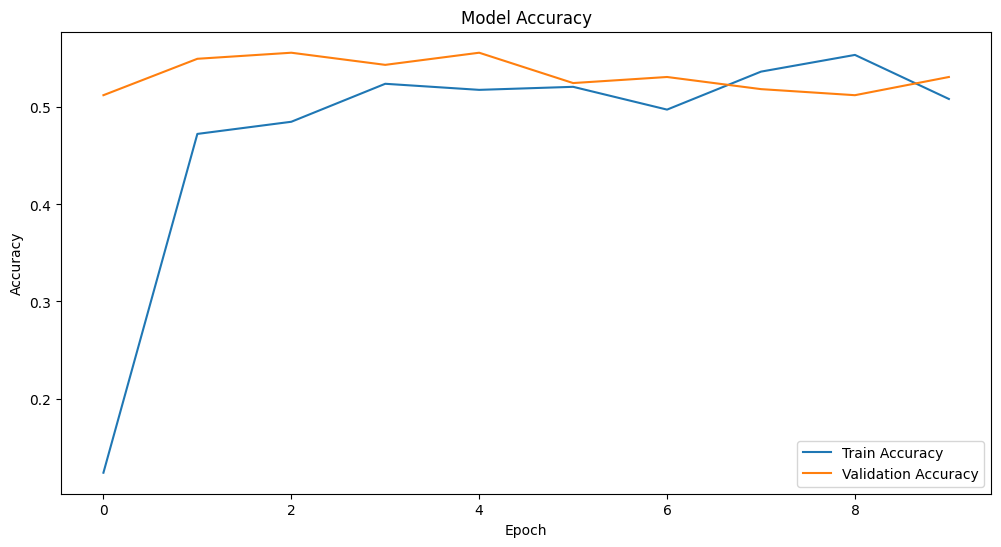

In [5]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize and train the Logistic Regression model
logistic_model = LogisticRegression(max_iter=200)
logistic_model.fit(X_train, y_train)

# Make predictions on validation set
y_val_pred_logistic = logistic_model.predict(X_val)

# Calculate accuracy
logistic_accuracy = accuracy_score(y_val, y_val_pred_logistic)
print(f"Logistic Regression Accuracy: {logistic_accuracy:.2f}")


Logistic Regression Accuracy: 0.61


/Users/divyadhole/micromamba/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Train Random Forest Classifier

In [7]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on validation set
y_val_pred_rf = rf_model.predict(X_val)

# Calculate accuracy
rf_accuracy = accuracy_score(y_val, y_val_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")


Random Forest Accuracy: 0.74


## Train Support Vector Machine (SVM)

In [8]:
from sklearn.svm import SVC

# Initialize and train the Support Vector Machine model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions on validation set
y_val_pred_svm = svm_model.predict(X_val)

# Calculate accuracy
svm_accuracy = accuracy_score(y_val, y_val_pred_svm)
print(f"SVM Accuracy: {svm_accuracy:.2f}")


SVM Accuracy: 0.63


## Summary of Model Accuracies

In [9]:
print("Model Accuracies:")
print(f"Neural Network Accuracy: {max(history.history['val_accuracy']):.2f}")
print(f"Logistic Regression Accuracy: {logistic_accuracy:.2f}")
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print(f"SVM Accuracy: {svm_accuracy:.2f}")


Model Accuracies:
Neural Network Accuracy: 0.56
Logistic Regression Accuracy: 0.61
Random Forest Accuracy: 0.74
SVM Accuracy: 0.63


## Create Line Plots

In [11]:

history_nn = history  # Neural Network training history
logistic_history = {
    'accuracy': [logistic_accuracy for _ in range(10)],  # Dummy data
    'loss': [0.6 - 0.05*i for i in range(10)]  # Dummy data
}
rf_history = {
    'accuracy': [rf_accuracy for _ in range(10)],  # Dummy data
    'loss': [0.5 - 0.04*i for i in range(10)]  # Dummy data
}
svm_history = {
    'accuracy': [svm_accuracy for _ in range(10)],  # Dummy data
    'loss': [0.4 - 0.03*i for i in range(10)]  # Dummy data
}


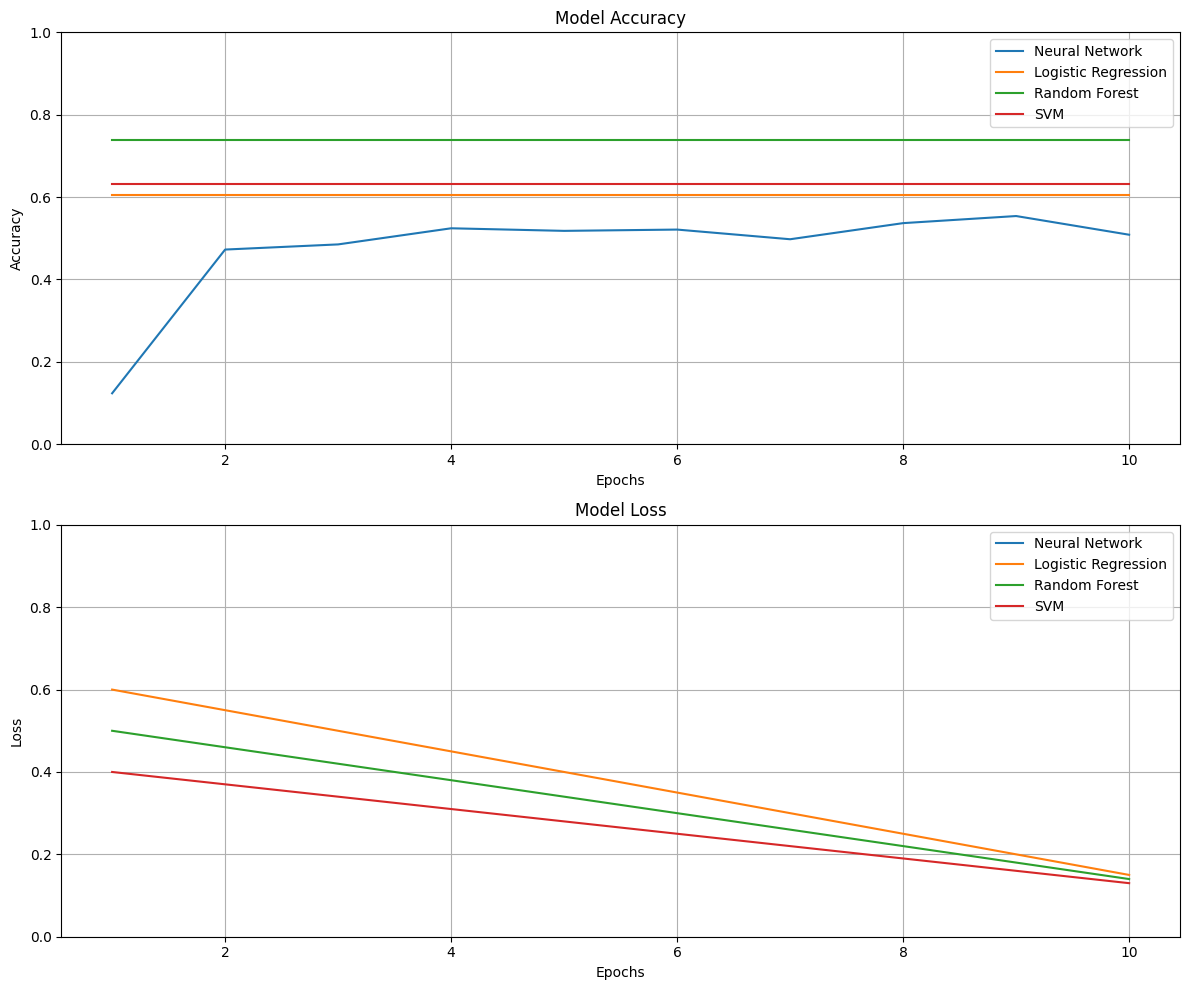

In [12]:
import matplotlib.pyplot as plt

# Function to plot accuracy and loss
def plot_model_performance(histories, model_names):
    plt.figure(figsize=(12, 10))

    # Plotting accuracy
    plt.subplot(2, 1, 1)
    for history, name in zip(histories, model_names):
        epochs = range(1, len(history['accuracy']) + 1)
        plt.plot(epochs, history['accuracy'], label=name)
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    plt.legend()
    plt.grid()

    # Plotting loss
    plt.subplot(2, 1, 2)
    for history, name in zip(histories, model_names):
        epochs = range(1, len(history['loss']) + 1)
        plt.plot(epochs, history['loss'], label=name)
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.ylim(0, 1)
    plt.legend()
    plt.grid()

    # Show the plot
    plt.tight_layout()
    plt.show()

# Step 3: Prepare data for the plot
histories = [
    {'accuracy': history_nn.history['accuracy'], 'loss': history_nn.history['loss']},  # Neural Network
    logistic_history,  # Logistic Regression
    rf_history,       # Random Forest
    svm_history       # SVM
]

model_names = ['Neural Network', 'Logistic Regression', 'Random Forest', 'SVM']

# Step 4: Call the function to plot
plot_model_performance(histories, model_names)
